# MPHY0021 - Hints for better software engineering practices


## Virtual Environments

Virtual environments are a great way to isolate the  use or development of a particular software and its dependencies from the rest of your software. We provided a [basic intro on our course](http://github-pages.ucl.ac.uk/rsd-engineeringcourse/ch04packaging/010Installation.html#Python-virtual-environments), with either `venv` or `conda`. 

It's, however, a good practice to keep these environents on a different place than the code. Some of you packaged the environment with the submission, which produced errors on the automation of the marking.

Personally, I have a fixed directory where I put all my environments, making it eassier for me to create helper functions that load these envs from anywhere I am in my computer as the path will be known, _e.g._, `$HOME/MyProject/bin/activate`. So in bash I could write this function into my `.bashrc` file:

```shell
function pyenv() {
    source $HOME/$1/bin/activate
}
```
This is somehow similar to what you get using `conda` environments, and now I could do: `pyenv MyProject` to activate that environment.



## Artifacts

When installing a library or running python files, you find there are files like `myprogram.pyc`, `__cache__`,  `.eeg`,  etc. These files should not be under version control, nor should they be shared around (or submitted). To keep these outside of your git repository you can add them to your `.gitignore` file (check [gitignore.io](https://www.gitignore.io) to generate common gitignore files for your projects based on your language, OS, IDE, etc.). To share a repository without these type of files you can run `git clean -fxd` to remove all the files that are not tracked on the repository.

## Using `argparse`

`argparse` has many options that help to keep code cleaner, here are some examples about how to use them.  Check the [official tutorial](https://docs.python.org/3/howto/argparse.html), and other [guides](https://pymotw.com/3/argparse/).


0. Don't mix `sys.argv` and `argparse`, there's no need.

For example:

```python
run_code(*parse_args(sys.argv[1:]))
```

If you call that program without passing any argument, then `parse_args` (if being from a parser) won't receive any value and only the default would be passed through. Additionally, that needs to output an iterable to `run_code`, but `argparse`'s `parse_args` returns a name space. If you create a new `parse_args`, then you are reinventing something that already exists in the core library of python.

1. Provide description to the command line and arguments

```python
import argparse

# a simple implementation of `ls`
parser = argparse.ArgumentParser(description="List directory contents")
parser.add_argument("FILE", help="List the information about the FILE")
args = parser.parse_args()

print(args.FILE)
```


```shell
$ python ls.py -h   

usage: ls.py [-h] FILE

list directory contents

positional arguments:
  FILE        List the information about the FILE

optional arguments:
  -h, --help  show this help message and exit

```

2. Store a default value to make the argument optional.

```python
import argparse

# a simple implementation of `ls`
parser = argparse.ArgumentParser(description="List directory contents")
parser.add_argument("FILE", help="List the information about the FILE",
                    default='.', nargs='?') # nargs is needed as it's a positional argument.
args = parser.parse_args()

print(args.FILE)
```

```shell
$ python ls.py                                                                                                                                                                                      . 

```

3. Set the default data type for the argument. Instead of writting a piece of code to check that the input value is correct, let argparse to do it for you

```python
import argparse

# a simple implementation of `ls`
parser = argparse.ArgumentParser(description="List directory contents")
parser.add_argument("FILE", help="List the information about the FILE",
                    default='.', nargs='?') # nargs is needed as it's a positional argument.
parser.add_argument('-p', '--padding', help="Padds the output with blank lines",
                    default=0, type=int)
args = parser.parse_args()

print("\n" * args.padding,
      args.FILE,
      "\n"*args.padding)
```

```shell
$ python ls.py -p 4.3
usage: ls.py [-h] [-p PADDING] [FILE]
ls.py: error: argument -p/--padding: invalid int value: '4.3'

```

4. Use flags that set booleans instead of a parameter with `True/False`, `Yes/No`. Very useful, for example, when you want to set a program to create a plot or not.

So, instead of writing:

```python
parser.add_argument('-t', '--time', help="Show the modification time of FILE",
                    type=str, default="yes")

```

and then later convert it into a boolean... This lets `argparse` do it for you:

```python
import argparse
import datetime
import os

# a simple implementation of `ls`
parser = argparse.ArgumentParser(description="list directory contents")
parser.add_argument("FILE", help="List the information about the FILEs",
                    default='.', nargs='?')
parser.add_argument('-p', '--padding', help="Padds the output with blank lines",
                    default=0, type=int)
parser.add_argument('-t', '--time', help="Show the modification time of FILE",
                   action='store_true')
args = parser.parse_args()

time = ''
if args.time:
    time = datetime.datetime.fromtimestamp(os.path.getmtime(args.FILE))

print("\n" * args.padding,
      time, args.FILE,
      "\n"*args.padding)
```

```shell
$ python ls.py
  . 
```

Or with the `-t` flag:

```shell
$ python /tmp/ls.py -t
 2019-03-30 11:48:40.999584 . 

```

## Booleans



### Using `True/False` instead of values

There are few languages that don't have the boolean data type, and `1` and `0`, or `Yes` and `No` have been used instead.  Python does have booleans, so this type of functions:

```python
def mycode(a, b, plot=0):
    if plot == 1:
      run_plot(a,b)
```

is not good practice. Something like this is preferred:

```python
def mycode(a, b, plot=False):
    if plot:
      run_plot(a,b)
```

Similarly with arguments like `left` or `right`. So instead to save a variable like:

```python
direction = 'left'

if direction == 'left':
    go_left()
else:
    go_right()
```

writing the code as:

```python
is_left = True

if is_left:
    go_left()
else:
    go_right()
```

makes the code more readable.

### Double negative

Some people submitted functions like

```python
def mycode(a, b, plot_off=True):
    if plot_off is False:
        run_plot(a,b)
```

This makes the code quite hard to read, whereas the following:

```python
def mycode(a, b, plot=False):
    if plot:
        run_plot(a,b)
```

is cleaner and easier to read.

### Unneeded `pass` or `continue`

In some code samples this is what we've seen:

```python
if plot:
    run_plot()
else:
    pass
```

The `else` block is unneeded.

Similarly, on some loops we've seen:

```python
for i in range(10):
    run_operation_with(i)
    if plot:
        run_plot()
    else:
        continue
```

That `continue` at the end of the loop is not needed. It makes sense, however if you want to skip some operation coming after the `if/else` block.

## Comments and documentation

### Use docstring instead of comments for classes and functions

We've seen a few variations of adding comments to a function:

```python
# This function adds numbers
def add(a, b):
     return a + b
```

or with the comment inside the function (sometimes not respecting indentation):

```python
def add(a, b):
# This function adds numbers
     return a + b
```

In such cases the use of [docstrings](http://github-pages.ucl.ac.uk/rsd-engineeringcourse/ch04packaging/04documentation.html) is preferred. 



```python
def add(a, b):
     '''
     Add numbers
     '''
     return a + b
```

### Docstrings formats

There are a couple of standards for docstrings, that help the integration of your files with documentation tools like sphinx. [NumpyDoc](https://numpydoc.readthedocs.io/en/latest/) is one of the most broadly used on the scientific libraries. Other languages and communities put effort into defining the structure of the documentation, and developing tools that make it easier to display and search. Learn about them! 

### Don't use multiline strings as to comment out lines

We've seen on many submissions the use of multiline-strings to comment-out code, for example:

```python
'''
length = 5
width = 2
height = 24
volume = length * width * height
'''
```

instead of:

```python
# length = 5
# width = 2
# height = 24
# volume = length * width * height
```

Note that the multi-line string is still "read" by python, where the commented out (using `#`) is ignored. Though the first may seem simpler to do when writing code, your text editor most certainly have some functions to comment out text that's selected.  For example, on Jupyter you can select the text and use <kbd>Ctrl</kbd> + <kbd>/</kbd>. Other shortcuts are available for [pycharm](https://www.jetbrains.com/help/pycharm/commenting-and-uncommenting-blocks-of-code.html), [vs code](https://code.visualstudio.com/shortcuts/keyboard-shortcuts-windows.pdf), ...

## Formatting


### f-strings

f-strings are more readable than c-style:

```python
age = 25
name = 'Eric'

print(f'{name} is {age} years old')
```
vs

```python
print("%s is %d years old" % (name, age))
```

Read more about it on this [fantastic guide](https://realpython.com/python-f-strings/).

### spacing after statements

In python some things are statements (_e.g._, `if`, `else`, `for`, ...) whereas other things are functions (_e.g._, `print`,  `range`, ...). It's not good practice to have the parentheses without or with a space respectively. So, the bad example would be:

```python
for( i in range (23)):
    if( i % 2 and i > 10 ):
        print (i)
```

and the most readable:

```python
for i in range(23):
    if ( i % 2 and i > 10 ):
        print(i)
```

Although in this example the parentheses on the `if` block are not needed, they are left in to show the preferred use on cases where they are needed (even if it's to aid readibility).

## Iterations

### `while` vs `for` and counters

Some times you need to run something a number of times; both `while` and `for` are used for that. However, sometimes the counter of the iteration is not important so you could do:

```python
i = 0
while i < 10:
    run_code()
    i += 1
```

or with `for`:

```python
for i in range(10):
    run_code()
```

Since we are not really using the variable `i` (only on the while to increase the counter), a general practice in python is to use `_` for unused variables, having therefore:

```python
for _ in range(10):
    run_code()
```


### Iterate over two lists

Imagine you have two lists and you want to know the differences of  one over the other. You could think of doing it like:

```python
for i in range(len(list1)):
    difference.append(list1[i] - list2[i])
```

However, it's cleaner using `zip`:

```python
for elem1, elem2 in zip(list1, list2):
    difference.append(elem1 - elem2)
```

and even cleaner using numpy arrays:
```python
difference = array1 - array2
```


### knowing how to use `range` and `list`

On a couple of occasions we've seen:

```python
x_list = list(range(number))
x_list = [x + 1 for x in x_list]
```

This could have been simplified with:

```python
x_list = list(range(1, number + 1))
```

And depending of where you are planning to use such list, you may not need to convert the range into a list.

## Functions

### Output of functions

It's not a good practice that functions return a piece of text, instead of the result. For example, this is preferred

```python
def sum(a, b):
    return a + b
```

instead of: 

```python
def sum(a, b):
    result = a + b
    return f'Sum of {a} + {b} = {result}'
```

The first option gives you more flexibility, as you can then use the result of the function in whatever way you want, printing or otherwise. It also makes your code more modular: the function is responsible for exactly one thing (in this case, the computation, not any associated output).

### Printing inside functions

Printing inside a function as the below sample shows, is not good practice:

```python
def sum(a, b):
    result = a + b
    print(f'Summing {a} and {b}')
    print(f'it produces {result}')
    return result
```

if you want to print when a function is running, then the use of a [logger](https://docs.python.org/3.7/library/logging.html) is preferred.


## Objects

### Using properties within the methods

On the first assignment you were asked to convert some functions into methods of an object. Some of you did the following (albeit for a different example),

From:

```python
def area_rectangle(width, height):
    return width * height

def perimeter(width, height):
    return 2 * (width + height)

```

To:




In [0]:
class Rectangle:
    def __init__(self, widht, height):
        self.height = height
        self.width = widht

    def perimeter(self, width, height):
        return 2 * (width + height)

    def area(self, width, height):
        return width * height


Note that in this case, everytime we want to calculate the perimeter or the area of the rectangle, we need to provide again the properties of such rectangle:


In [0]:
myRectangle = Rectangle(3, 2)
print(myRectangle.perimeter(3, 2))

10


Instead, we can define the rectangle as:

In [ ]:
class Rectangle:
    def __init__(self, widht, height):
        self.height = height
        self.width = widht

    def perimeter(self):
        return 2 * (self.width + self.height)

    def area(self):
        return self.width * self.height

Making the calculation of the perimeter as:

In [0]:
myRectangle = Rectangle(3, 2)
print(myRectangle.perimeter())

10


This second option is preferred as it's using the properties of the created object. It's therefore truly called as a method of the object, and not as an independent function within a class.

### Updating the properties

Imagine that we need a method to increase the area of the rectangle. You could do something like:


In [0]:
class Rectangle:
    def __init__(self, widht, height):
        self.height = height
        self.width = widht

    def perimeter(self):
        return 2 * (self.width + self.height)

    def area(self):
        return self.width * self.height
     
    def increase_area(self, value):
        return self.width * self.height * value

So if we want to calculate the area we would do:

In [0]:
myRectangle = Rectangle(3, 2)
print(myRectangle.increase_area(5))
print(myRectangle.area())

30
6


but as you can see, the method is not really doing what its name suggests, _i.e._, increasing the area of `myRectangle`, but only returning a new value.

A better implementation would be:

In [0]:
class Rectangle:
    def __init__(self, widht, height):
        self.height = height
        self.width = widht

    def perimeter(self):
        return 2 * (self.width + self.height)

    def area(self):
        return self.width * self.height
     
    def increase_area(self, value):
        self.width *= value

myRectangle = Rectangle(3, 2)
myRectangle.increase_area(5)
print(myRectangle.area())

30


If we now have to run a set of increases, for example as given in a list, they could run as:

In [0]:
factors = [2, 3, 5, 6]
myRectangle = Rectangle(3, 2)
for factor in factors:
    myRectangle.increase_area(factor)
print(myRectangle.area())

1080


### Method that allows easy exchange of operation

Sometimes we want our objects to offer the ability to be modified, but let the user specify exactly how that change should happen. Note that there are many ways of doing this; the example below is one of the simplest.

Imagine that our rectangle is defined as follows:

In [0]:
class Rectangle:
    def __init__(self, widht,height):
        self.height = height
        self.width = widht
        self.x = None
        self.y = None

    def perimeter(self):
        return 2 * (self.width + self.height)

    def area(self):
        return self.width * self.height

    def set_ll_coordinates(self, x0=0, y0=0):
        '''
        Places the lower left corner of the rectangle on the coordinates given.
        '''
        self.x = [x0, self.width + x0]
        self.y = [y0, self.height + y0]

    def expand(self, expand_x=0, expand_y=0):
        self.x[1] += expand_x
        self.y[1] += expand_y
        self.width = self.x[1] - self.x[0]
        self.height = self.y[1] - self.y[0]


This new rectangle can be placed into a 2D grid as we can set the properties:

In [0]:
myRectangle = Rectangle(3, 2)
myRectangle.set_ll_coordinates()
print(f'The rectangle has x:({myRectangle.x}) and y:({myRectangle.y})')
print(f'The new area is {myRectangle.area()}')
myRectangle.expand(3, 2)
print(f'The rectangle has x:({myRectangle.x}) and y:({myRectangle.y})')
print(f'The new area is {myRectangle.area()}')


The rectangle has x:([0, 3]) and y:([0, 2])
The new area is 6
The rectangle has x:([0, 6]) and y:([0, 4])
The new area is 24


If we want to have a method to expand the rectangle maintaing the aspect ratio, there are (at least) two possibilities for that:

1. **Uniform** expansion

![uniform](https://drive.google.com/uc?export=view&id=1RyTLYx-J3RUQEGsR47pgqyQtXGaDGVxQ)

2. **Centered** expansion 

![centered](https://drive.google.com/uc?export=view&id=1Z5ITwp9BR8FXj4C2FgMtLkN3QuKUcQQT)

We can write the `Rectangle` class so that the user can choose which of the two expansions modes should be used (or, indeed, any other approach that they can provide). The user controls this by passing an appropriate function as an argument to the method.

In [0]:
class Rectangle:
    def __init__(self, widht, height):
        self.height = height
        self.width = widht
        self.x = None
        self.y = None

    def perimeter(self):
        return 2 * (self.width + self.height)

    def area(self):
        return self.width * self.height

    def set_ll_coordinates(self, x0=0, y0=0):
        '''
        Places the lower left corner of the rectangle on the coordinates given.
        '''
        self.x = [x0, self.width + x0]
        self.y = [y0, self.height + y0]
    
    def _update_dimensions(self):
        self.width = self.x[1] - self.x[0]
        self.height = self.y[1] - self.y[0]
      

    def expand(self, expand_x=0, expand_y=0):
        self.x[1] += expand_x
        self.y[1] += expand_y
        self._update_dimensions()        

    def expand_keep_aspect(self, value, mode):
        '''
        New rectangle is expanded by a value using an input function
        
        parameters
        ----------
        value: int, float
           How much to expand - Increase on area depends on mode used

        mode: function
           How rectangle is expanded. Function needs to return pair of x and y
           coordinates from a pair of x,y and a value of expansion.
        '''

        self.x, self.y = mode(self.x, self.y, value)
        self._update_dimensions()        
        

def uniform_expand(x, y, value=0):
    return (x[0], x[1] + value), (y[0], y[1] + value)


def centered_expand(x, y, value=0):
    half = value / 2
    return (x[0] - half, x[1] + half), (y[0] - half, y[1] + half)

  
myRectangle = Rectangle(3, 2)
myRectangle.set_ll_coordinates(-2, -4)
print(f'The rectangle has x:({myRectangle.x}) and y:({myRectangle.y})')
print(f'The new area is {myRectangle.area()}')
myRectangle.expand_keep_aspect(3, uniform_expand)
print(f'The rectangle has x:({myRectangle.x}) and y:({myRectangle.y})')
print(f'The new area is {myRectangle.area()}')
myRectangle.expand_keep_aspect(-3, centered_expand)
print(f'The rectangle has x:({myRectangle.x}) and y:({myRectangle.y})')
print(f'The new area is {myRectangle.area()}')



The rectangle has x:([-2, 1]) and y:([-4, -2])
The new area is 6
The rectangle has x:((-2, 4)) and y:((-4, 1))
The new area is 30
The rectangle has x:((-0.5, 2.5)) and y:((-2.5, -0.5))
The new area is 6.0


## Working with files

### Variable from a yaml file

A few people used the `exec` function to convert into variables what was read from a yaml file.

for example:

```python
config = yaml.load(open("config.yaml"))
for key, value in config.items():
    exec(key + "= value")
```

The use of `exec` is not a good practice, mostly because you don't have a proper way to know what variables you are creating. If this has been used in order to pass these variables later into a function, then others ways are preferred, for example:

```python

def volume(height=1, width=1, depth=1):
    return height * width * depth
  
config = yaml.load(open("config.yaml"))

print(volume(**config))
```
Furthermore, keep in mind that `exec` will run whatever code you give it: in real-world applications, It's dangerous to execute arbitrary (including potentially malicious) code that a user inputs!

### Where to read the data from?

If you are writing a library with an entry point command, you want to allow to the user to run that command from anywhere and use (read/write) the files in the place your user is.

For example, the following code will save the figure on the library directory and not where's run:

```python
plt.savefig(os.path.join(os.path.dirname(__file__), fig_name))
```

because `__file__` is the location of where the code is. So, somthing like:

```python
plt.savefig( fig_name)
```

would save the figure in the directory you are running that from.

## Performance

Many gave a comparison like "it runs faster till *x* steps and then slower". Remember that when discussing performance and scalability, we are usually interested in how the program behaves for *larger* (technically, arbitrarily large) input sizes - its *perfomance law*. That said, in practical applications it can also be interesting to know at what point, for instance, one implementation overtakes another, so comparisons like the example above may also be useful.

There was some confusion and inconsistencies in the answers to the complexity question. Firstly, note the (very important!) difference between polynomial `n**2` and exponential `2**n`: 


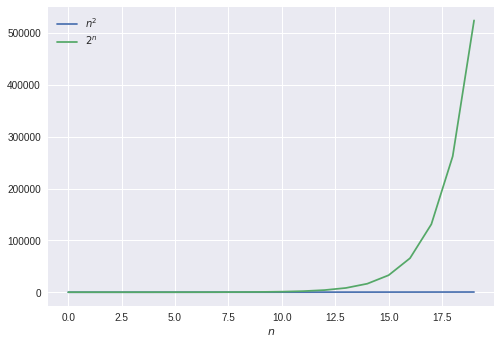

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(20)
plt.plot(x_range, x_range**2, label='$n^2$')
plt.plot(x_range, 2**x_range, label='$2^n$')
plt.xlabel('$n$')
plt.legend()
plt.show()

Roughly speaking, the performance law is $2^n$ if processing input of size $n+1$ takes twice as long as input of size $n$. Some answers misstated that as e.g. the time doubles when the input size doubles -- however, the performance law would then be linear, not exponential!

To accurately identify the exponential law, some people did a statistical fit, and found that the value of $a$ for which the curve $a^n$ best matches the data is approximately $a = e^{0.693}$ (or $2$, as its friends call it  :-) ). While this is a good approach, note that it assumes that the law is exponential to start with -- so it is not applicable if you do not already have some idea of the general form that you can justify. Many curves can fit the same data, especially if you don't have lots of observations, so finding an explanation of *why* the peformance is as you say is stronger than a purely statistical process. That's not to say that the fit itself is wrong; in fact, it can be very useful evidence to complement the explanation!